# Bank-Marketing-Prediction

In [827]:
# import all necessary libraries
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# model metrics 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# import models

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Get the data

In [828]:
# load the data with a delimiter = ;
df = pd.read_csv('dataset/bank-full.csv', delimiter=';')

In [829]:
# get a headup of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [830]:
df.shape

(45211, 17)

In [831]:
# get a description of our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [832]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Explore and visualize the data 

In [833]:
# create an additional dataframe that holds features upon exploration
df_features = pd.DataFrame()

In [834]:
# check the datatypes of our features
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [835]:
# describe our numerical data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [836]:
# describe our categorical data
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [837]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Target variable: y**

In [838]:
# used to convert columns with values (no, yes) into numerical values of (0, 1)
def yes_no_encoder(data):
    if 'no' in data:
        data = 0
    elif 'yes' in data:
        data = 1
    
    return data

In [839]:
# convert our categorical target to numeric
df['y'] = df['y'].apply(yes_no_encoder)

In [840]:
df_features['y'] = df['y']

0    39922
1     5289
Name: y, dtype: int64


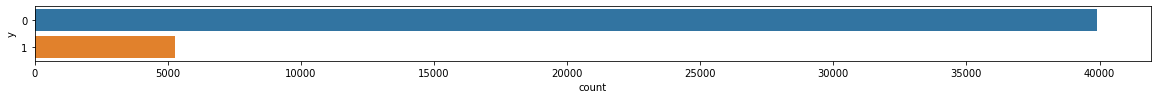

In [841]:
fig = plt.figure(figsize=(20, 1))
sns.countplot(y='y', data=df)
print(df.y.value_counts())

**Feature: Age**

In [842]:
df_features['age'] = df['age']

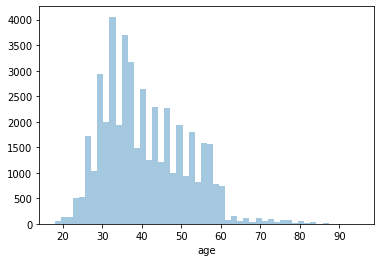

In [843]:
sns.distplot(df_features['age'], kde=False)

**Feature: Job**

In [844]:
df_features['job'] = df['job']

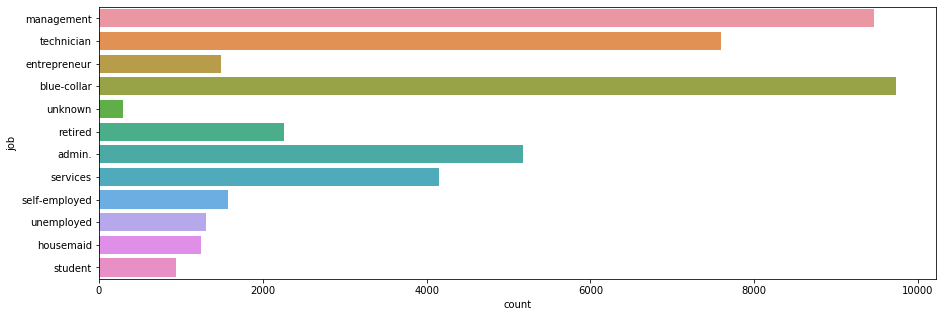

In [845]:
plt.figure(figsize=(15, 5))
sns.countplot(y='job', data=df_features)

**Feature: marital**

In [846]:
df_features['marital'] = df['marital']

In [847]:
# returns percentage distribution of all categorical items in a specified column
def value_perc(feature):
    perc = feature.value_counts(normalize=True).reset_index()
    perc.columns = ['value', 'perc']
    perc['perc'] = round( perc['perc'] * 100 , 2)
    return perc

      value   perc
0   married  60.19
1    single  28.29
2  divorced  11.52


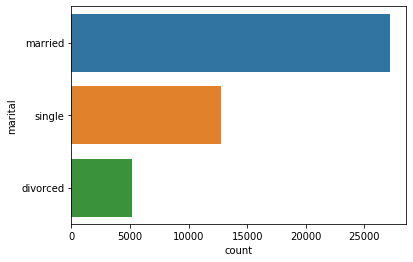

In [848]:
sns.countplot(y='marital', data=df_features)
print(value_perc(df_features.marital))

**Feature: Education**

In [849]:
df_features['education'] = df['education']

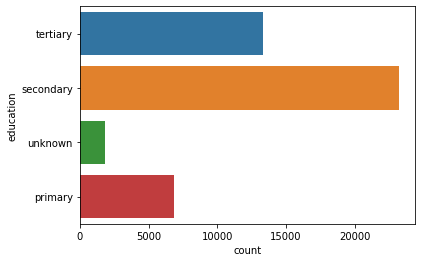

In [850]:
sns.countplot(y='education', data=df_features)

**Feature: default**

In [851]:
df_features['default'] = df['default']

In [852]:
# conver categorical default values to numeric values
df_features['default'] = df_features['default'].apply(yes_no_encoder)

  value  perc
0    no  98.2
1   yes   1.8


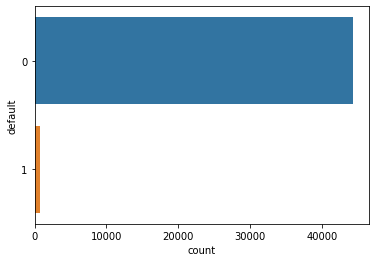

In [853]:
sns.countplot(y='default', data=df_features)
print(value_perc(df['default']))

**Feature: Balance**

In [854]:
df_features['balance'] = df['balance']

The mean balance:  1362.27
The mean balance:  3044.77


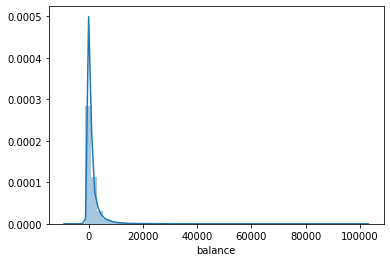

In [855]:
sns.distplot(df_features['balance'])
print("The mean balance: ", round(df_features['balance'].mean(), 2))
print("The mean balance: ", round(df_features['balance'].std(), 2))

In [856]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


**Feature: Housing**

In [857]:
df_features['housing'] = df['housing']

In [858]:
df_features['housing'] = df_features['housing'].apply(yes_no_encoder) # convert yes/no to numeric equivalent

  value   perc
0   yes  55.58
1    no  44.42


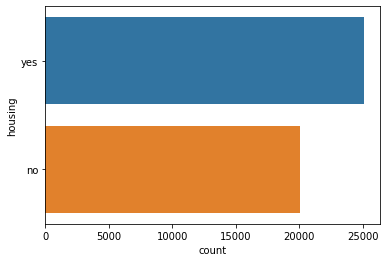

In [859]:
sns.countplot(y='housing', data=df)
print(value_perc(df['housing']))

**Feature: Loan**

In [860]:
df_features['loan'] = df['loan']

In [861]:
df_features['loan'] = df_features['loan'].apply(yes_no_encoder)

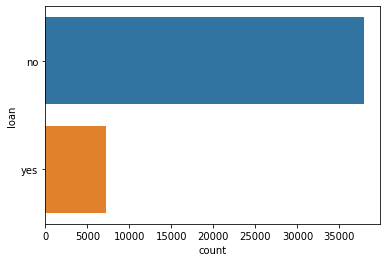

In [862]:
sns.countplot(y='loan', data=df)

**Feature: Contract**

In [863]:
df_features['contact'] = df['contact']

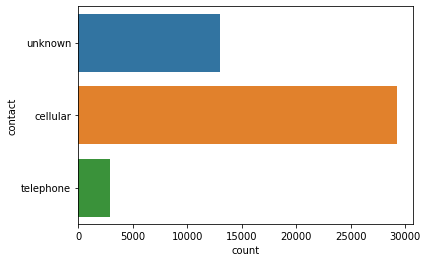

In [864]:
sns.countplot(y='contact', data=df_features)

**Feature: Day**

In [865]:
df_features['day'] = df['day']

Mean number of day:  15.80641879188693
Mean number of day:  8.322476153044592


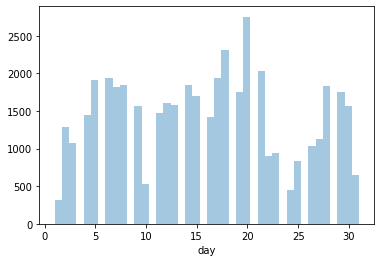

In [866]:
sns.distplot(df_features['day'], kde=False)
print("Mean number of day: ", df_features['day'].mean())
print("Mean number of day: ", df_features['day'].std())

**Feature: month**

In [867]:
df_features['month'] = df['month']

   value   perc
0    may  30.45
1    jul  15.25
2    aug  13.82
3    jun  11.81
4    nov   8.78
5    apr   6.49
6    feb   5.86
7    jan   3.10
8    oct   1.63
9    sep   1.28
10   mar   1.06
11   dec   0.47


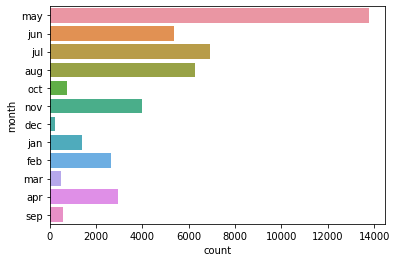

In [868]:
sns.countplot(y='month', data=df_features)
print(value_perc(df_features['month']))

**Feature: Duration**

In [869]:
df_features['duration'] = df['duration']

Mean duration:  258.1630797814691
Std.Dev duration:  257.5278122651719


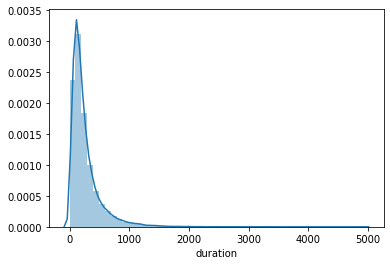

In [870]:
sns.distplot(df_features['duration'])
print("Mean duration: ", df_features['duration'].mean())
print("Std.Dev duration: ", df_features['duration'].std())

**Feature: Campaign**

In [871]:
df_features['campaign'] = df['campaign']

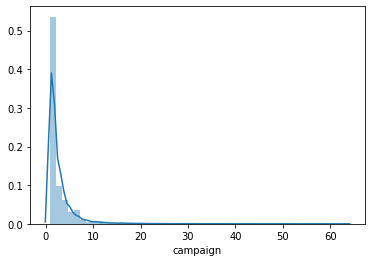

In [872]:
sns.distplot(df_features['campaign'])

**Feature: Pdays**

In [873]:
df_features['pdays'] = df['pdays']

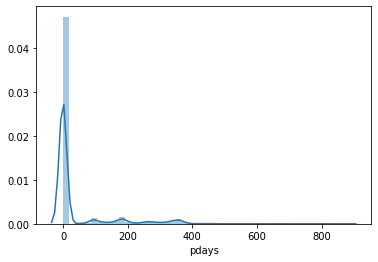

In [874]:
sns.distplot(df_features['pdays'])

**Feature: Previous**

In [875]:
df_features['previous'] = df['previous']

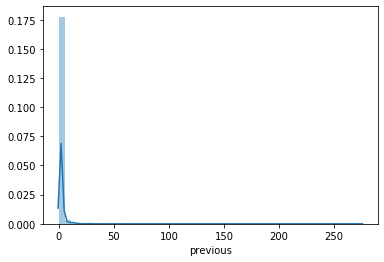

In [876]:
sns.distplot(df_features['previous'])

**Feature: Poutcome**

In [877]:
df_features['poutcome']=  df['poutcome']

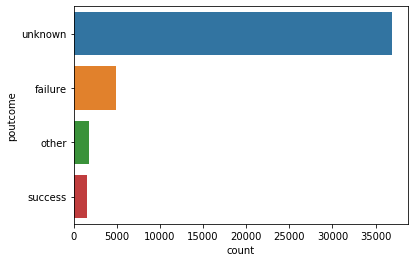

In [878]:
sns.countplot(y='poutcome', data=df_features)

In [879]:
# check for missing values
def missing_values(data):
    return data.isnull().sum()

missing_values(df_features)

y            0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Prepare the data

**Feature encoding**

In [880]:
# get all categorical feature
obj_cols = df_features.select_dtypes(include=['object']).columns

In [881]:
# get dummies for string features
df_features = pd.get_dummies(df_features, columns=obj_cols, drop_first=True)

**Train/test split**

In [882]:
y = df_features['y']
X = df_features.drop(['y'], axis=1)

In [883]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Sampling our data**

In [885]:
X = pd.concat([X_train, y_train], axis=1)
not_fraud = X[X.y==0]
fraud = X[X.y==1]

In [886]:
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

In [887]:
downsampled = pd.concat([not_fraud_downsampled, fraud])
y_train = downsampled.y
X_train = downsampled.drop('y', axis=1)

**Feature Scaling**

In [888]:
from sklearn.preprocessing import StandardScaler

In [889]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the machine learning model

In [890]:
# train the model and use it to predict the label for unseen data
def fit_ml_algo(algo, X_train, y_train, X_test, y_test):
    
    model = algo.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = round(accuracy_score(y_pred, y_test) * 100, 2)
    cf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = precision_score(y_pred, y_test)
    f1 = f1_score(y_test, y_pred)
     
    return acc, cf_matrix, precision, recall, f1

**Logistic regression**

Accuracy:  84.09
Precision:  0.4184629803186504
Recall:  0.8185151237396884
F1 Score:  0.5537984496124031


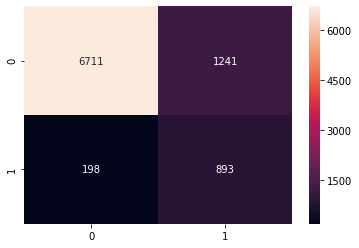

In [891]:
acc, cf_matrix, precision, recall, f1 = fit_ml_algo(LogisticRegression(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

**Random Forest**

Accuracy:  83.7
Precision:  0.4113015284854099
Recall:  0.8139321723189734
F1 Score:  0.5464615384615386


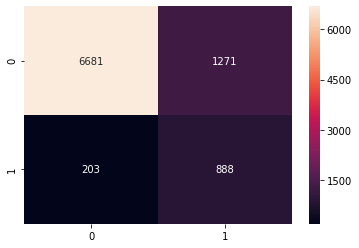

In [892]:
acc, cf_matrix, precision, recall, f1 = fit_ml_algo(RandomForestClassifier(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

**Support Vector Machine**

Accuracy:  84.64
Precision:  0.4277400581959263
Recall:  0.8084326306141155
F1 Score:  0.5594671741198859


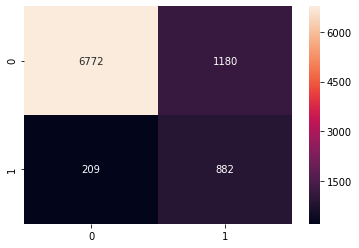

In [893]:
acc, cf_matrix, precision, recall, f1 = fit_ml_algo(LinearSVC(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)